In [33]:
import pandas as pd
import sklearn.feature_extraction
pd.set_option('max_colwidth', 80)
from sklearn.feature_extraction import text

import re
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d

# STACK OVERFLOW
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')


def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """
    # Mentions (@), RTs and https removed
    s = re.sub(r"([@#&]\w+)|https\S+|RT|:|;|\n|@", '', s)
    s = deEmojify(s)
    return s

In [34]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [35]:
test = X.map(clean_twitter)
test.head(5)

0      Here's CNN on Sharia law. You can be stoned or have your hands cut off, bu...
1      LOOK obama Clinton cronies ILLEGALLY arm  train muslims terrorist includin...
2                                                       from 2013  gets crowned     
3                                             Say 'Islam is peace', or else!        
4                                                     All aboard the Trump Train!   
Name: tweet, dtype: object

Test data looks ok!

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

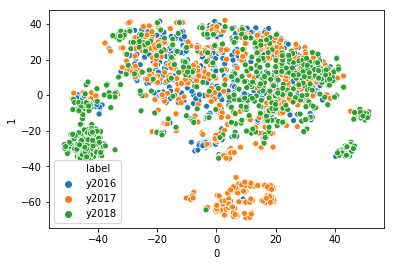

In [37]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

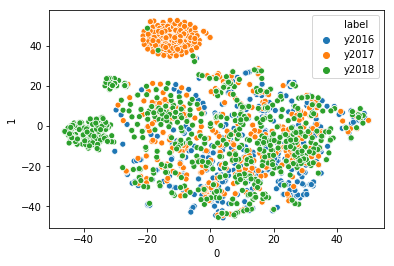

In [38]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sammacintyre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


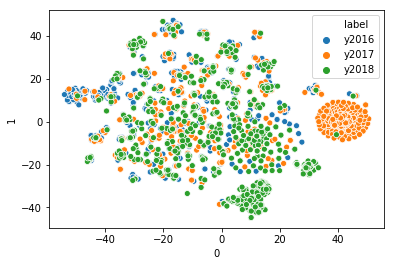

In [49]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



# Collect English Stopwords
stops = set(stopwords.words('english'))


# Run the vectoriser
tfidf_vectorizer = TfidfVectorizer(stop_words=stops)

# TF-IDF feature matrix
V = tfidf_vectorizer.fit_transform(test)
ax, d = plot_embedding(V, y)